# Wine Quality Prediction

**Felipe Lemos e Lucca Barufatti**

### Descrição do projeto

A certificação e a avaliação da qualidade são questões cruciais na indústria vinícola. Atualmente, a qualidade do vinho é principalmente avaliada por testes físico-químicos (por exemplo, níveis de álcool) e sensoriais (por exemplo, avaliação por especialistas humanos). O objetivo desse projeto é utilizar técnicas de aprendizado de máquina para construir um modelo que seja capaz de prever a qualidade dos vinhos. Para isso, faremos uso de conjuntos de dados relacionados à variante tinta do vinho "Vinho Verde" do norte de Portugal. Esses conjuntos de dados consistem em variáveis físico-químicas e sensoriais, uma vez que informações sobre tipos de uva, marca de vinho e preço de venda não estão disponíveis devido a questões de privacidade e logística.

Este projeto representa uma oportunidade para aplicar conhecimentos da eletiva Machine Learning na indústria vinícola, contribuindo para aprimorar a qualidade do vinho e auxiliar os especialistas na tomada de decisões.


<img src="wine.png"  width="600" height="300">

### Sobre o dataset:

O conjuntos de dado estão relacionados à variante tinta do vinho português "Vinho Verde". Devido a questões de privacidade e logística, apenas variáveis físico-químicas (entradas) e sensoriais (saída) estão disponíveis (por exemplo, não há dados sobre tipos de uva, marca de vinho, preço de venda do vinho, etc.).

As classes são ordenadas e não estão balanceadas (por exemplo, há muito mais vinhos normais do que excelentes ou ruins).

### Importando as bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler,  LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, mean_squared_error
import warnings
warnings.filterwarnings("ignore")


## Analise Exploratória

## Dataset: Level 0 Analysis

**Input variables (based on physicochemical tests):**

- ```fixed acidity```: Variável contínua que representa a quantidade de ácido tartárico em um vinho.

- ```volatile acidity```: Variável contínua que mede a quantidade de ácido acético volátil em um vinho.

- ```citric acid```: Variável contínua que indica a quantidade de ácido cítrico presente no vinho.

- ```residual sugar```: Variável contínua que representa a quantidade de açúcar residual em um vinho.

- ```chlorides```: Variável contínua que mede a quantidade de cloretos presentes no vinho.

- ```free sulfur dioxide```: Variável contínua que indica a quantidade de dióxido de enxofre livre no vinho.

- ```total sulfur dioxide```: Variável contínua que representa a quantidade total de dióxido de enxofre no vinho.

- ```density```: Variável contínua que mede a densidade do vinho.

- ```pH```: Variável contínua que indica o pH do vinho.

- ```sulphates```: Variável contínua que representa a quantidade de sulfatos presentes no vinho.

- ```alcohol```: : ariável contínua que indica o teor alcoólico do vinho.

**Output variable (based on sensory data):**

- ```quality```:  Variável discreta e ordenada que representa a qualidade do vinho, com valores variando de 0 a 10.

In [2]:
df = pd.read_csv('winequality-red.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**1599 dados, tipagem Correta e sem dados nulos!**

In [4]:
print(df.duplicated().sum(), 'dados duplicados')
df = df.drop_duplicates()
print(df.duplicated().sum(), 'dados dupplicados depois de removidos')

240 dados duplicados
0 dados dupplicados depois de removidos


## Analysing Columns Individualy: Level 1 Analysis

O objetivo dessa etapa é obter insights sobre a distribuição e as características das variáveis contínuas. Essa compreensão guiará as etapas subsequentes do projeto, como pré-processamento de dados, seleção das features e escolha de técnicas de classificação adequadas para modelar com precisão a qualidade de vinho.

**1. Histogramas** : Para cada variável contínua, levando em consideração um número adequado de bins (intervalos): a raiz quadrada do número de pontos de dados. Na análise dos histogramas, observaremos os seguintes padrões:

       a. Assimetria: Se a distribuição possui uma cauda longa assimétrica em um dos lados ou se é simétrica.
  
       b. Multimodalidade: Se há apenas um pico proeminente na distribuição ou vários picos.
   
       c. Saturação: Se existem barras isoladas e altas em uma das extremidades do histograma, indicando uma alta concentração de pontos de dados nessa região.
   
       d. Histogramas "não naturais"**: Atenção a quaisquer irregularidades, como gráficos truncados, que podem indicar uma variável ordinal discreta em vez de contínua, ou histogramas uniformes, que podem sugerir que os dados representam numeração sequencial em vez de medições reais.
  

**2. Outliers** : Análise dos histogramas para identificar quaisquer barras pequenas que estejam distantes na cauda da distribuição. Essas barras podem representar outliers, ou seja, pontos de dados significativamente diferentes da maioria do conjunto de dados.

**3. Diagramas de caixa (box plots)**: Além dos histogramas, utilizaremos diagramas de caixa para visualizar quantis importantes, como a mediana, quartis e a existência de outliers. Os diagramas de caixa fornecem uma visão rápida da tendência central, dispersão e quaisquer valores extremos potenciais na distribuição.


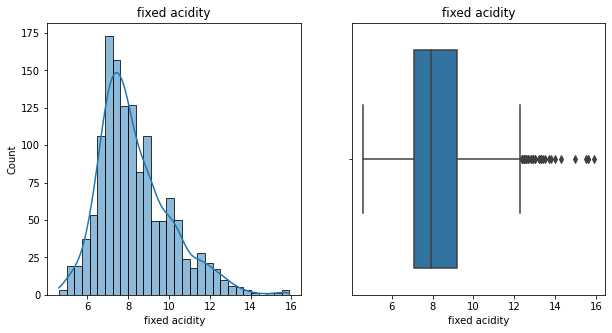

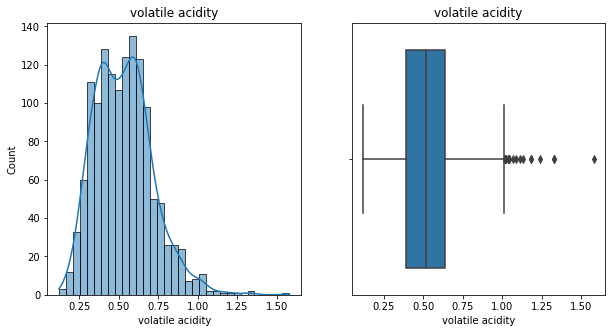

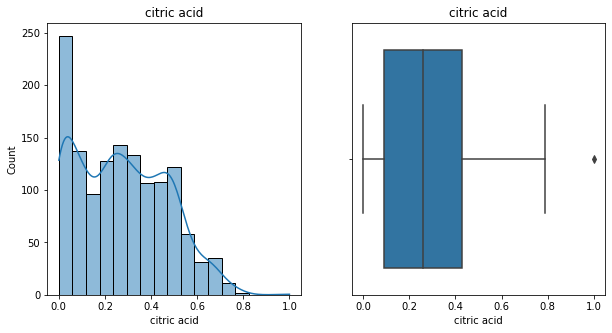

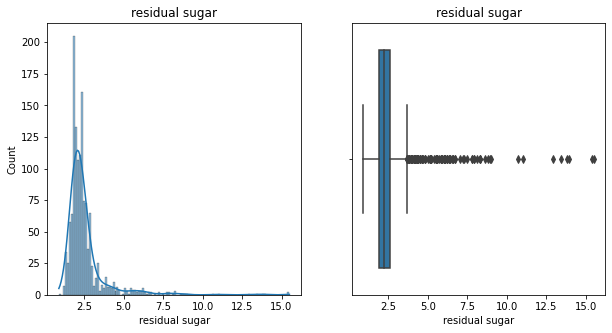

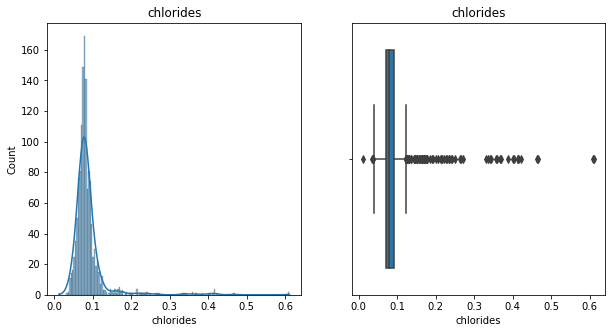

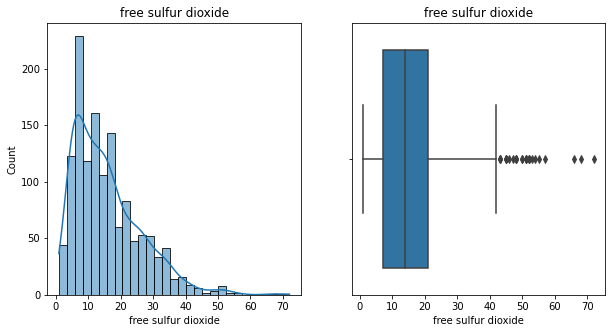

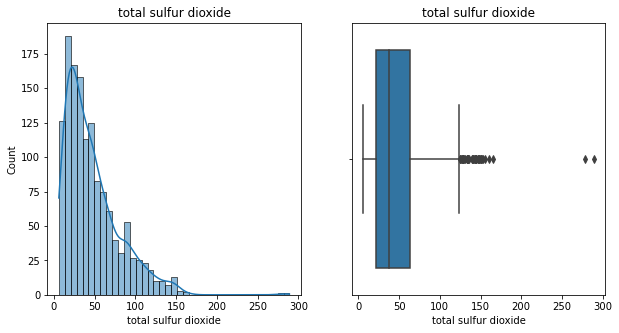

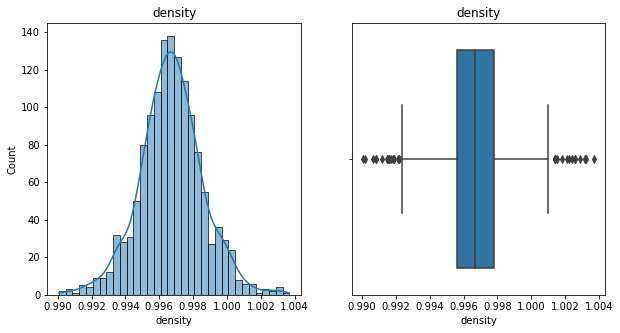

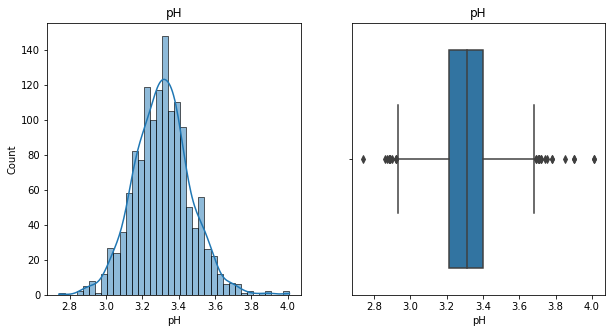

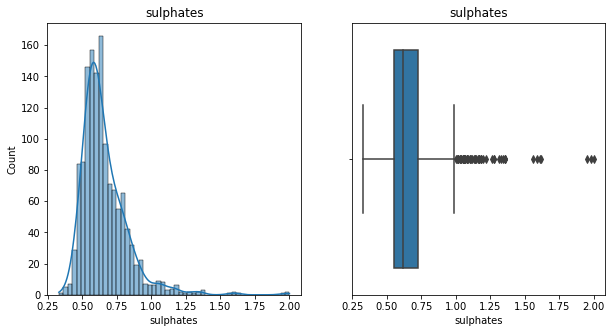

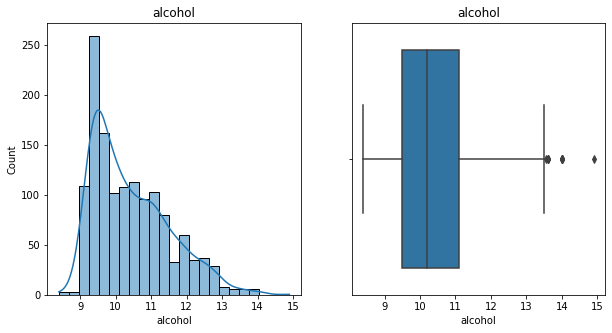

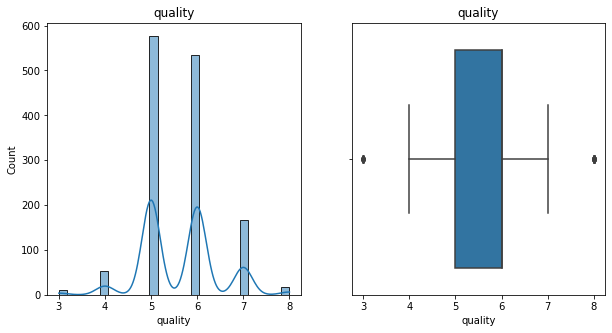

In [5]:
for i in df.columns:
    fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
    sns.histplot(x=df[i], kde=True, ax=axs[0])
    sns.boxplot(x=df[i], ax=axs[1])
    axs[0].set_title(i)    
    axs[1].set_title(i)
    plt.show()

### Insights histogramas e box plot: 

- ```fixed acidity```: Assimetria à direita, praticamente unimodal. Somente outliers acima do limite superior do boxplot. 

- ```volatile acidity```: Assimetria à direita, bimodal.  Somente outliers acima do limite superior do boxplot. 

- ```citric acid```: Assimetria à direita, multi modal. Somente um outlier acima do limite superior do boxplot. 

- ```residual sugar```: Simétrico, unimodal. Número de outliers expressivo, acima do limite superior do boxplot. 

- ```chlorides```: Simétrico, unimodal. Alguns outliers antes do limite inferior e muitos depois do limite superior do boxplot.

- ```free sulfur dioxide```: Assimetria à direita, praticamente unimodal. Somente outliers acima do limite superior do boxplot. 

- ```total sulfur dioxide```: Assimetria à direita, unimodal. Somente outliers acima do limite superior do boxplot. 

- ```density```: Simétrico e unimodal, outliers antes e depois de ambos os limites do boxplot.
 
- ```pH```: Simétrico e unimodal, outliers antes e depois de ambos os limites do boxplot.

- ```sulphates```: Simétrico e unimodal. Número de outliers expressivo, acima do limite superior do boxplot. 

- ```alcohol```: Assimetria à direita, praticamente unimodal. Somente outliers acima do limite superior do boxplot. 
    
- ```quality```:  Simétrico e bimodal. Apenas dois outliers. Concentração no meio, ou seja, sem vinhos com nota 0, 1, 9 ou 10.  

### Remover ou Manter os Outliers?

No contexto do nosso projeto de qualidade de vinho, é importante considerar que certas características dos vinhos podem naturalmente resultar em valores extremos em algumas variáveis. Por exemplo, em um vinho de alta qualidade, pode ser esperado encontrar valores atípicos em certas propriedades, como teor alcoólico, acidez ou concentração de certos compostos.

Portanto, remover todos os outliers pode levar à perda de informações importantes e distorcer a representação real dos dados. 

## Analysing Columns Jointly: Level 2 Analysis

Analisar colunas em conjunto. 

- Contínuo versus contínuo

- Correlação

- Contínuo versus discreto 

Nessa etapa, estamos calculando a matriz de correlação entre todas as variáveis contínuas do dataset. Em seguida, plotamos um heatmap para visualizar as correlações. Isso nos ajudará a identificar quais variáveis têm uma relação mais forte ou mais fraca entre si.

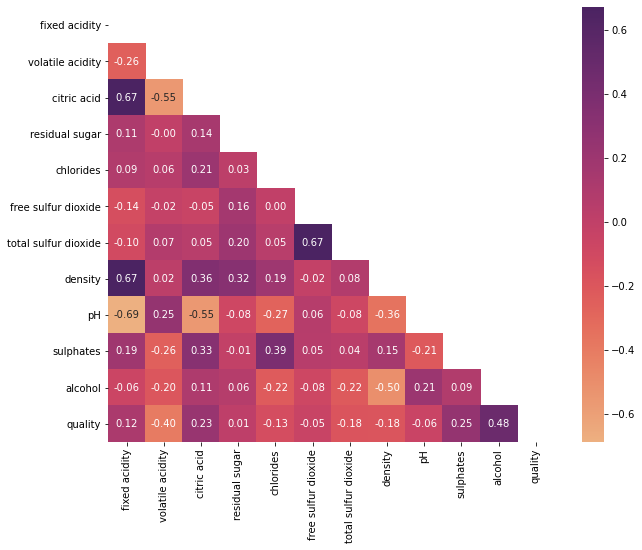

In [6]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='flare', fmt=".2f", mask = np.triu(correlation_matrix))
plt.show()


### Análise dos coeficientes das correlações

Seguindo a tabela a seguir como parâmentro de categorização das correlações:

|Coeficiente de Correlação|	Classificação|
|-|-|
|0 < r ≤ 0,1| Nula |
|0,1 < r ≤ 0,3|Fraca |
|0,3 < r ≤ 0,6	|Moderada|
|0,6 < r  ≤ 0,9	|Forte|
|0,9 < r < 1|	Muito Forte|
|r = 1	|Perfeita|

#### Mapeamento váriavel individual x Target (quality):

*Correlações Nulas*:
- Positivas: 
        - residual sugar
- Negativas:
        - free sulfur dioxide
        - pH

*Correlações Fracas*:
- Positivas: 
        - fixed acidity
        - citric acid
        - sulphates
- Negativas:
        - chlorides
        - total sulfur dioxide
        - density

*Correlações Moderadas*:
- Positivas: 
        - alcohol
- Negativas:
        - volatile acidity

*Nenhuma correlação forte*

*Nenhuma correlação muito forte*

*Nenhuma correlação perfeita*

Nessa etapa , estamos realizando uma análise visual das relações entre a variável alvo "quality" e as demais variáveis do conjunto de dados.

Para cada coluna do DataFrame df, exceto a coluna "quality", estamos gerando um gráfico de barra usando a biblioteca Seaborn (sns). O eixo x representa a qualidade do vinho e o eixo y representa a respectiva variável em análise.

Essa etapa nos permite visualizar como cada variável se relaciona com a qualidade do vinho. Podemos observar se existem diferenças significativas nas médias ou nas distribuições das variáveis em relação à qualidade do vinho, além de ajudar a identificar quais variáveis podem ter uma relação mais forte com o queremos prever. Se houver diferenças notáveis nas médias ou nas distribuições entre as classes de qualidade, isso sugere que a variável pode ser um bom indicador da qualidade do vinho e ser útil para a modelagem preditiva.

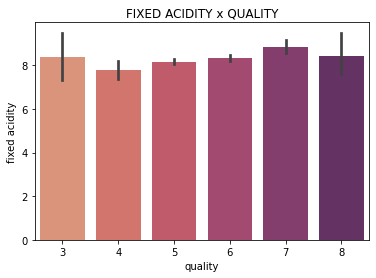

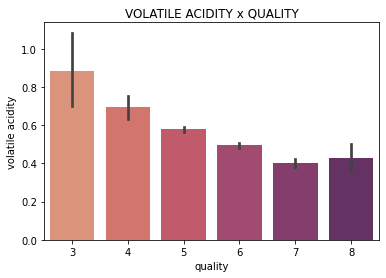

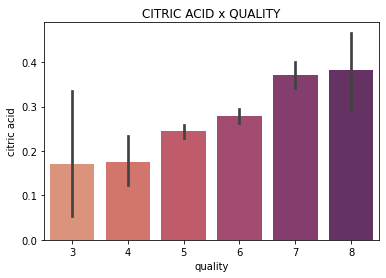

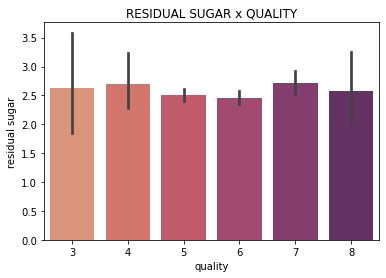

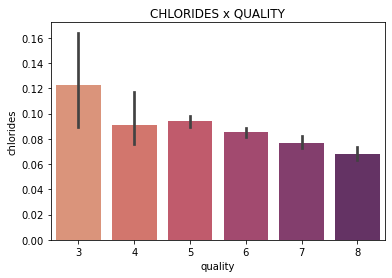

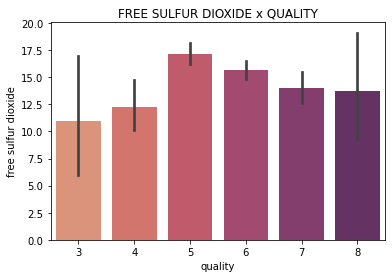

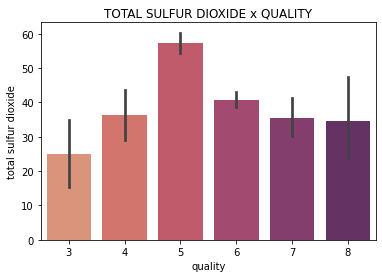

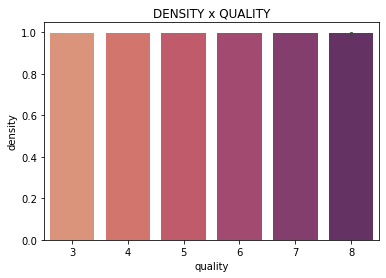

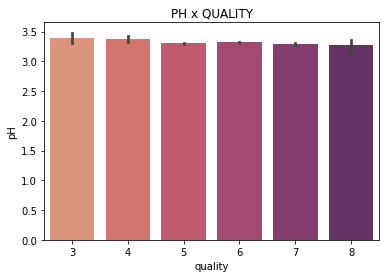

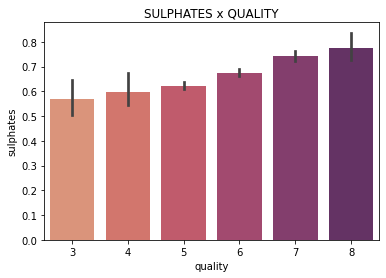

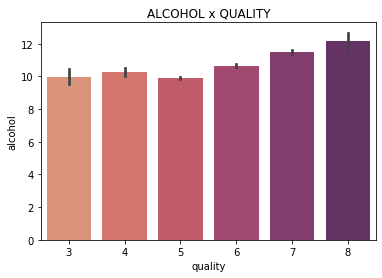

In [7]:
for i in df.columns:
    if i != 'quality':
        sns.barplot(x=df['quality'], y=df[i], palette='flare').set(title=f'{i.upper()} x QUALITY')
        plt.show()


### Análise dos gráficos feature x target
 
#### Observando os gráficos, observamos que um bom vinho (notas mais altas, entre 7 e 8) possui: 

- indiferente quantidade de ácidos fixos (tártarico, málico, sucínico) 
- ⬇️ baixa quantidade de ácidos voláteis ou gasosos (acético)
- ⬆️ alta quantidade de ácidos cítricos
- indiferente para quantidades de açucares residuais
- ⬇️ baixa quantidade de cloretos
-  média quantidade de dióxido de enxofre livre 
-  média quantidade do total de dióxido de enxofre 
- indiferente para densidade
- indiferente para valores de pH
- ⬆️ alta quantidade de sulfatos
- ⬆️ alta quantidade de álcool





Nessa etapa vamos transformar a variável "qualidade" em três tipos, com o objetivo de simplificar o problema de classificação, reduzindo a complexidade do modelo. Ao agrupar os valores da variável "qualidade" em três categorias, estamos criando uma tarefa de classificação com um número menor de classes, o que pode facilitar a interpretação dos resultados e melhorar o desempenho do modelo.

Como mencionado anteriormente, temos vinhos com qualidade de 3 a 8, dessa forma, a seguinte classificação será usada:

- 3 ou 4: Vinho Ruim 


- 5 ou 6: Vinho Médio


- 7 ou 8: Vinho Bom


In [8]:
qualidade_mapping = {3: 1, 4: 1, 5: 2, 6: 2, 7: 3, 8: 3}
df["quality"] = df["quality"].map(qualidade_mapping)


### Dividir os dados em conjuntos de treinamento e teste:
Nessa etapa, estamos utilizando a função train_test_split do scikit-learn para dividir as variáveis de entrada (X) e a variável alvo (y) em conjuntos separados de treinamento e teste. O parâmetro test_size especifica a proporção dos dados que será alocada para o conjunto de teste (neste exemplo, 20% dos dados), e random_state garante a reprodutibilidade da divisão.

### Feature Engineering
Decidimos retirar as colunas que se mostraram indiferentes durante o processo de preparação dos dados. Essa remoção tem como objetivo simplificar o conjunto de variáveis e focar nas colunas que de fato se mostraram significantes. Isso nos permite otimizar a análise e a modelagem, concentrando nossos esforços nas variáveis que têm um impacto mais significativo na qualidade.

In [9]:
X = df[['volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'alcohol']]
# X = df.drop("quality", axis=1)  
y = df["quality"] 

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Pré-processamento dos dados:

Nessa etapa, estamos utilizando o StandardScaler do scikit-learn para padronizar as variáveis numéricas de entrada. Isso é importante para garantir que todas as variáveis estejam em uma escala semelhante, o que pode melhorar o desempenho de certos algoritmos de aprendizado de máquina.

In [11]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### Modelos

Nesta etapa do projeto, estamos avaliando diferentes modelos de classificação para o problema de prever a qualidade do vinho. Cada modelo é avaliado com base em várias métricas de desempenho, e o objetivo é identificar o modelo que melhor se adequa ao conjunto de dados e às necessidades do projeto.

- **Logistic Regression** (Regressão Logística): A regressão logística é um modelo amplamente utilizado para problemas de classificação binária. Neste caso, estamos tratando de um problema de classificação multiclasse, onde a qualidade do vinho pode ter diferentes valores. No entanto, podemos usar a regressão logística com a estratégia "one-vs-rest" para lidar com problemas multiclasse.


- **K-Nearest Neighbors (KNN)**: O KNN é um algoritmo simples e intuitivo que classifica uma amostra com base nas classes dos k vizinhos mais próximos. É um método não paramétrico e pode ser eficaz em casos onde os dados possuem uma estrutura espacial.


- **Decision Tree**: As árvores de decisão são modelos que utilizam uma estrutura hierárquica de decisões para realizar a classificação. Elas são fáceis de interpretar e podem capturar relações não lineares nos dados.


- **Gaussian Naive Bayes**: O Naive Bayes é um classificador probabilístico baseado no teorema de Bayes. O Naive Bayes Gaussiano assume que as variáveis possuem uma distribuição Gaussiana e é adequado para dados contínuos.


- **Support Vector Machine**: As máquinas de vetores de suporte são modelos que encontram um hiperplano de separação ótimo entre as classes. Elas podem lidar tanto com problemas de classificação binária quanto com problemas multiclasse.


- **Random Forest**: A Floresta Aleatória é um ensemble de árvores de decisão que combina as previsões de várias árvores individuais. Isso ajuda a reduzir o overfitting e melhorar a generalização do modelo.

Para compararmos os diferentes modelos de aprendizado de máquina, utilizamos a técnica de validação cruzada com k-fold. Essa abordagem nos permite avaliar o desempenho dos modelos em dados não vistos. Os dados são divididos em k subconjuntos (folds) de tamanho iguale em cada iteração, um dos folds foi utilizado como conjunto de teste e os demais como conjunto de treinamento. Essa técnica é eficiente para avaliar a capacidade de generalização dos modelos, evitando problemas como overfitting. Também é útil na seleção de modelos e ajuste de hiperparâmetros.

O objetivo dessa etapa do projeto é comparar o desempenho desses diferentes modelos em relação às métricas de avaliação, como acurácia, precisão, recall, F1-score e erro quadrático médio. Essas métricas nos ajudam a entender a capacidade dos modelos em classificar corretamente as amostras de acordo com sua qualidade de vinho correspondente.

Ao avaliar e comparar os modelos, podemos identificar qual deles apresenta o melhor desempenho geral e, assim, selecionar o modelo mais adequado para a tarefa de previsão da qualidade do vinho.

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error

models = [
    ('Logistic Regression', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('Decison Tree', DecisionTreeClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('Support Vector Machine', SVC()),
    ('Random Forest', RandomForestClassifier())
]

# Avaliar cada modelo
results = []
names = []
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro', 'neg_mean_squared_error']
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_validate(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)

### Visualizando os resultados e escolha do Modelo

In [13]:
metrics_dict = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'MSE': []
}

for result in results:
    metrics_dict['Accuracy'].append(result['test_accuracy'].mean() * 100)
    metrics_dict['Precision'].append(result['test_precision_macro'].mean())
    metrics_dict['Recall'].append(result['test_recall_macro'].mean())
    metrics_dict['F1-score'].append(result['test_f1_macro'].mean())
    metrics_dict['MSE'].append(-result['test_neg_mean_squared_error'].mean())


results_df = pd.DataFrame(metrics_dict, index=names)

results_df_styled = results_df.style.highlight_max(color='green', axis=0).highlight_min(color='red', axis=0).set_properties(**{'font-weight': 'bold'})

display(results_df_styled)


,Accuracy,Precision,Recall,F1-score,MSE
Logistic Regression,82.928649,0.518676,0.406564,0.410201,0.172919
KNN,81.307734,0.425763,0.380769,0.380196,0.195746
Decison Tree,74.467865,0.423066,0.442600,0.426012,0.264145
Naive Bayes,79.689542,0.528535,0.501316,0.483831,0.207516
Support Vector Machine,81.825708,0.284640,0.350000,0.313282,0.181743
Random Forest,83.150327,0.491224,0.417445,0.424360,0.168497



Com base nos resultados apresentados acima, o modelo de **Random Forest** obteve o maior desempenho em termos de acurácia, com um valor de 83.22%. Além disso, apresentou valores relativamente altos de precisão, recall e F1-score, indicando uma boa capacidade de classificação. O erro médio quadrático (MSE) também foi o menor entre os modelos avaliados.

Portanto, com base nessas métricas de desempenho, o modelo de Random Forest foi a melhor escolha  para prever a qualidade do vinho com base nas características fornecidas. 

### Model Final: Random Forest

Após escolhermos o modelo Random Forest como o modelo final, o próximo passo é realizar o re-treinamento do modelo usando todos os dados de treinamento disponíveis e, em seguida, fazer previsões nos dados de teste. Essa etapa nos permite avaliar o desempenho do modelo final em dados não vistos e obter uma estimativa mais precisa de sua capacidade de generalização.

In [14]:
final_model = RandomForestClassifier()
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
mse = mean_squared_error(y_test, y_pred)

print("\033[1mDesempenho do modelo Random Forest:\033[0m")

print(f"\n\033[1mAccuracy\033[0m: Indica a taxa de acertos do modelo em relação ao total de previsões. O valor obtido para o modelo Random Forest foi de {accuracy*100:.2f}%")

print(f"\n\033[1mPrecision\033[0m: Representa a proporção de previsões positivas corretas em relação ao total de previsões positivas. O modelo obteve uma precisão de {precision*100:.2f}%")

print(f"\n\033[1mRecall\033[0m: Reflete a proporção de exemplos positivos corretamente classificados em relação ao total de exemplos positivos. O valor de recall foi de {recall*100:.2f}%")

print(f"\n\033[1mF1-score\033[0m: É uma métrica que combina a precisão e o recall em um único valor, fornecendo uma medida geral do desempenho do modelo. O F1-score obtido foi de {f1*100:.2f}%")

print(f"\n\033[1mMSE\033[0m (Mean Squared Error): Mede a média dos erros quadrados entre as previsões do modelo e os valores reais. O valor de MSE foi de {mse:.2f}")

Desempenho do modelo Random Forest:

Accuracy: Indica a taxa de acertos do modelo em relação ao total de previsões. O valor obtido para o modelo Random Forest foi de 84.19%

Precision: Representa a proporção de previsões positivas corretas em relação ao total de previsões positivas. O modelo obteve uma precisão de 49.60%

Recall: Reflete a proporção de exemplos positivos corretamente classificados em relação ao total de exemplos positivos. O valor de recall foi de 46.69%

F1-score: É uma métrica que combina a precisão e o recall em um único valor, fornecendo uma medida geral do desempenho do modelo. O F1-score obtido foi de 47.53%

MSE (Mean Squared Error): Mede a média dos erros quadrados entre as previsões do modelo e os valores reais. O valor de MSE foi de 0.16


### Estudando a importância das features


alcohol                 18.813235
volatile acidity        16.435783
sulphates               14.929548
citric acid             13.592213
chlorides               13.039801
total sulfur dioxide    12.826583
free sulfur dioxide     10.362838
dtype: float64


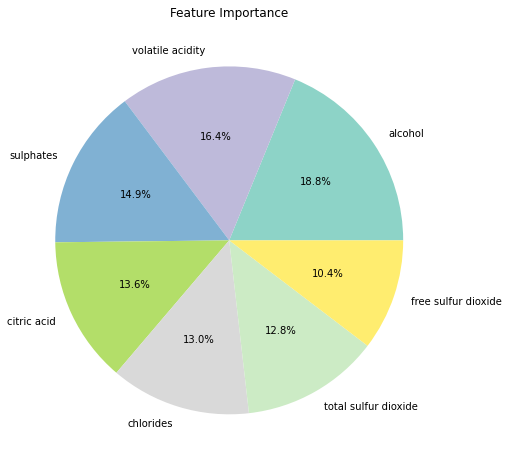

In [15]:
feature_scores = pd.Series(final_model.feature_importances_ * 100, index=X.columns).sort_values(ascending=False)

print(feature_scores)

plt.figure(figsize=(8, 8))

colors = plt.cm.Set3(np.linspace(0, 1, len(feature_scores)))

plt.pie(feature_scores, labels=feature_scores.index, autopct='%1.1f%%', colors=colors)

plt.title('Feature Importance')

plt.show()

### Conclusão

Ao concluir este projeto de classificação da qualidade do vinho, seguimos várias etapas importantes. Inicialmente, exploramos e visualizamos os dados por meio de gráficos, o que nos permitiu entender melhor a distribuição das variáveis e sua relação com a qualidade do vinho. Em seguida, realizamos uma análise de correlação para identificar possíveis relações entre as variáveis e o target. Prosseguimos com a escolha do modelo de classificação, comparando o desempenho de diferentes algoritmos por meio da validação cruzada. Com base nos resultados, escolhemos o modelo Random Forest devido ao seu desempenho superior.

Após o treinamento do modelo selecionado, avaliamos sua performance utilizando métricas como acurácia, precisão, recall, F1-score e MSE. Essas métricas nos forneceram uma visão abrangente do desempenho do modelo em termos de sua capacidade de classificação correta e de sua precisão na previsão de valores.

Por fim, realizamos uma análise da importância das features e identificamos as variáveis mais relevantes para a classificação da qualidade do vinho. Essa etapa nos permitiu entender quais características têm maior impacto na determinação da qualidade do vinho.

 Com base nesses resultados, podemos concluir que a qualidade do vinho pode ser classificada com uma boa acurácia usando o modelo Random Forest e considerando as features selecionadas. No entanto, é importante ressaltar que sempre há margem para aprimoramentos e refinamentos adicionais, como a exploração de outros algoritmos e técnicas de feature engineering para melhorar ainda mais o desempenho do modelo.